<a href="https://colab.research.google.com/github/adityav1810/Semester_5_Labs/blob/master/ECSE440L-DeepLearning/LAB6/LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
y_test = tf.keras.utils.to_categorical(y_test)
y_train=tf.keras.utils.to_categorical(y_train)

In [4]:
print('Shape of train Data',(X_train.shape,y_train.shape))
print('Shape of test Data',(X_test.shape,y_test.shape))

Shape of train Data ((60000, 28, 28), (60000, 10))
Shape of test Data ((10000, 28, 28), (10000, 10))


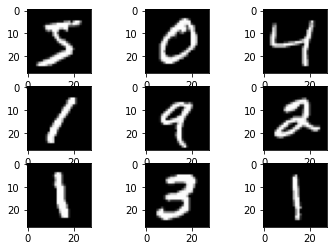

In [5]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [8]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0


 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 4  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.9088
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1379 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1092 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0950 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9742


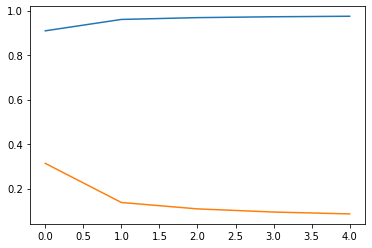

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1665 - accuracy: 0.9503
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0669 - accuracy: 0.9807
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0511 - accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9898


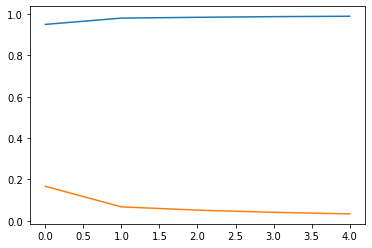

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 128  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1535 - accuracy: 0.9546
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0547 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0250 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9948


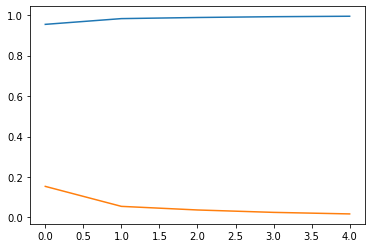

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 512  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2569 - accuracy: 0.9506
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0508 - accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0325 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0204 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0136 - accuracy: 0.9955


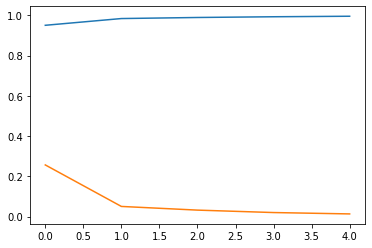

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 2056  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.8787 - accuracy: 0.9458
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0611 - accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0254 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0189 - accuracy: 0.9935


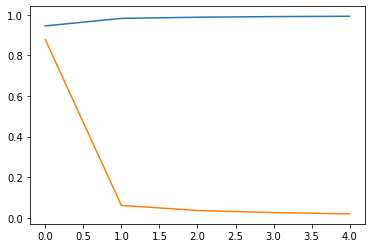

In [9]:
no_of_filters=[4,32,128,512,2056]
for filters in no_of_filters:
  print(" #### RUNNING MODEL WITH 1 HIDDEN LAYER AND",filters," FILTERS OF SIZE 3x3")
  model=Sequential()
  model.add(Conv2D(filters, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(X_train,y_train,epochs=5)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['loss'])
  plt.show()


 #### RUNNING MODEL WITH  1  HIDDEN LAYER AND  32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1570 - accuracy: 0.9534
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0643 - accuracy: 0.9807
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0486 - accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0384 - accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0312 - accuracy: 0.9900


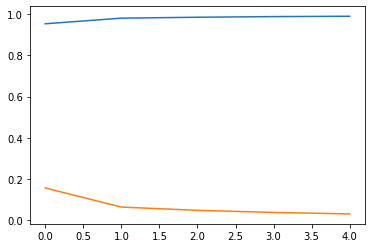

 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1236 - accuracy: 0.9633
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156 - accuracy: 0.9951


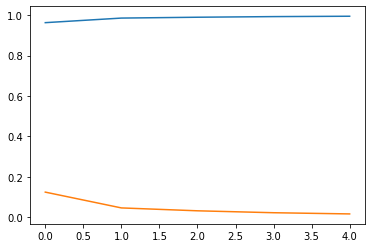

 #### RUNNING MODEL WITH  3  HIDDEN LAYER AND  32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1108 - accuracy: 0.9664
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0297 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0169 - accuracy: 0.9942


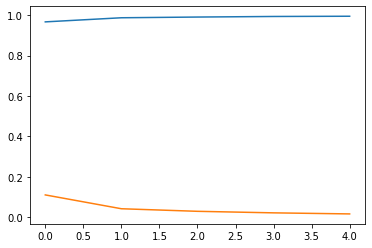

 #### RUNNING MODEL WITH  4  HIDDEN LAYER AND  32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1102 - accuracy: 0.9665
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0462 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0191 - accuracy: 0.9939


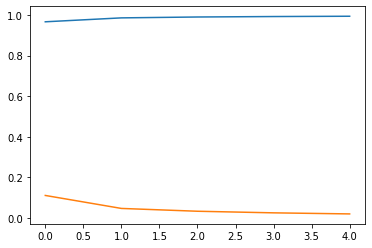

In [13]:
for no_of_layers in range(4):
  print(" #### RUNNING MODEL WITH ",no_of_layers+1," HIDDEN LAYER AND ",32," FILTERS OF SIZE 3x3")
  model=Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  for i in range(no_of_layers):
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(X_train,y_train,epochs=5)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['loss'])
  plt.show()
